In [1]:
using Plots
using LaTeXStrings
using Roots

# Examen 2
## Física computacional
#### Aquino Chapa Martha Abril 
Hecho en Julia 

#### 1. Se tiene un oscilador armónico en dos dimensiones (xy) en el que la fuerza está dada por $\vec{F}= −k\vec{r}$ y se tiene una fricción $\vec{f}_{fric} = −γ\vec{v}$ si $|\vec{v}| ≤ 1$, pero cuando $|\vec{v}| > 1$ la fricción es $\vec{f}_{fric} = −µv^{3/2}\hat{v}$. Si m = 1, k = 1, γ = 0.1 y µ = 0.2, resuelva las siguientes ejercicios:

#### (a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas. No es necesario resolver las ecuaciones.

Debido a la segunda ley de Newton, tendremos que la fuerza total del sistema será igual a la masa por la aceleración del sistema. Así se tiene que:
$$m\vec{a}=\vec{F}+\vec{f}_{fric}=m\frac{d^{2}\vec{r}}{dt^{2}} $$

Por lo cual se obtiene que:
Si $|\vec{v}|≤1$
$$m\frac{d^{2}\vec{r}}{dt^{2}} =−k\vec{r}−γ\vec{v}=−k\vec{r}−γ\frac{d\vec{r}}{dt} $$
Si $|\vec{v}|>1$
$$m\frac{d^{2}\vec{r}}{dt^{2}} =−k\vec{r}−µv^{3/2}\hat{v}=−k\vec{r}−µv^{1/2}\vec{v}=−k\vec{r}−µ(\frac{dr}{dt})^{1/2}\frac{d\vec{r}}{dt}$$

Ahora, sustituimos los valores dados y separamos las ecuaciones por componentes cartesianas.

En la coordenada $x$:

$$ \begin{cases}
 m\frac{d^{2}x}{dt^{2}}=−kx−γ\frac{dx}{dt} &   si  & |\vec{v}|≤1 \\
m\frac{d^{2}x}{dt^{2}}=−kx−µ\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dx}{dt} &  si  & |\vec{v}|>1
\end{cases}$$

En el eje y:
$$ \begin{cases}
 m\frac{d^{2}y}{dt^{2}}=−ky−γ\frac{dy}{dt} &   si  & |\vec{v}|≤1 \\
m\frac{d^{2}y}{dt^{2}}=−ky−µ\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dy}{dt} &  si  & |\vec{v}|>1
\end{cases}$$

Sustituyendo las constantes dadas:

En el eje x:
$$ \begin{cases}
 \frac{d^{2}x}{dt^{2}}=−x−0.1\frac{dx}{dt} &   si  & |\vec{v}|≤1 \\
\frac{d^{2}x}{dt^{2}}=−x−0.2\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dx}{dt} &  si  & |\vec{v}|>1
\end{cases}$$
En el eje y:
$$ \begin{cases}
 \frac{d^{2}y}{dt^{2}}=−y−0.1\frac{dy}{dt} &   si  & |\vec{v}|≤1 \\
\frac{d^{2}y}{dt^{2}}=−y−0.2\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)\right)^{1/4}\frac{dy}{dt} &  si  & |\vec{v}|>1
\end{cases}$$


Con lo cual podemos escribir el siguiente sistema de ecuaciones diferenciales:

$$x'=v_x $$
$$y'=v_y$$
$$ \begin{cases}
 v_x'=−x−0.1v_x &   si  & |\vec{v}|≤1 \\
v_x'=−x−0.2\left(v_x^{2}+v_y^{2}\right)^{1/4}v_x &  si  & |\vec{v}|>1
\end{cases}$$
En el eje y:
$$ \begin{cases}
v'_y=−y−0.1v_y &   si  & |\vec{v}|≤1 \\
v_y'=−y−0.2\left(v_x^{2}+v_y^{2}\right)^{1/4}v_y &  si  & |\vec{v}|>1
\end{cases}$$

#### (b) Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de movimiento en el inciso anterior con condiciones iniciales $\vec{r}_0 = (0, 1)$ y $\vec{v}_0 = (\cos θ,\sin θ)$, donde $\theta =\frac{\pi n}{6}$ con n = 0, 1, 2, 3, ..., 10, 11.

Con las ecuaciones anteriores, podemos crear una función que nos devuelva la información del sistema de ecuaciones diferenciales lineales.

In [2]:
function sistema1(x,t)
    dx=x[3]
    dy=x[4]
    v=x[3]^2+x[4]^2
    if sqrt(v)<=1
        dv_x=-x[1]-0.1*x[3]
        dv_y=-x[2]-0.1*x[4]
    else
        dv_x=-x[1]-0.2*(v^(1/4))*x[3]
        dv_y=-x[2]-0.2*(v^(1/4))*x[4]
    end
    return [dx,dy,dv_x,dv_y]
end

sistema1 (generic function with 1 method)

Ahora, extraemos la función de Runge-Kutta de 4to orden visto en clase:

In [3]:
function RK_4(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 1 method)

Probamos nuestra solución con n=0.

In [18]:
tiempo1_p=collect(0:0.01:70π)
sol1_p=RK_4(sistema1,[0.0,1.0,1.0,0.0],tiempo1_p)
#println(sol1_p[:,1])

21992×4 Array{Float64,2}:
  0.0         1.0         1.0          0.0
  0.00999484  0.99995     0.998951    -0.00999484
  0.0199787   0.9998      0.997802    -0.0199787
  0.0299506   0.99955     0.996555    -0.0299506
  0.0399095   0.999201    0.99521     -0.0399095
  0.0498544   0.998752    0.993767    -0.0498544
  0.0597845   0.998204    0.992226    -0.0597845
  0.0696986   0.997557    0.990587    -0.0696986
  0.0795959   0.99681     0.988851    -0.0795959
  0.0894753   0.995965    0.987017    -0.0894753
  0.0993359   0.995021    0.985087    -0.0993359
  0.109177    0.993978    0.983061    -0.109177
  0.118997    0.992837    0.980938    -0.118997
  ⋮                                   
 -6.36545e-6  1.53073e-5  1.59439e-5   6.36545e-6
 -6.20578e-6  1.53702e-5  1.59908e-5   6.20578e-6
 -6.04564e-6  1.54314e-5  1.6036e-5    6.04564e-6
 -5.88506e-6  1.54911e-5  1.60796e-5   5.88506e-6
 -5.72405e-6  1.55491e-5  1.61215e-5   5.72405e-6
 -5.56264e-6  1.56056e-5  1.61618e-5   5.56264e-6
 -5.4

Ahora, creamos un ciclo para cumplir la condición de que $\theta=\frac{\pi n}{6}$ con n = 0, 1, 2, 3, ..., 10, 11.

In [5]:
#Definimos nuestro conjunto de n's
n=collect(0:11)
#Definimos el tiempo donde evaluaremos la función
tiempo1=collect(0:0.1:100)
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
end

Presentamos el resultado a manera de gráfica:

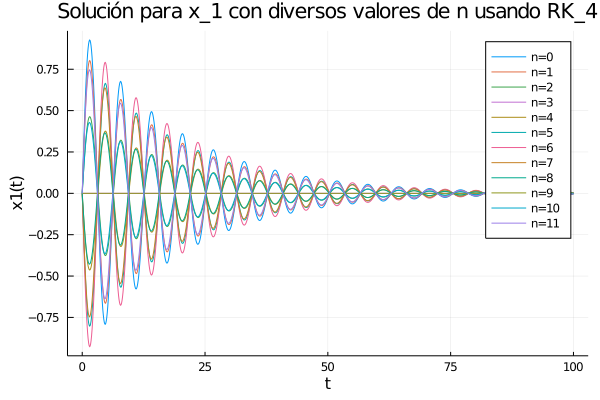

In [6]:
plot(title="Solución para x_1 con diversos valores de n usando RK_4",xlabel="t",ylabel="x1(t)")
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
    plot!(tiempo1,sol1[:,1],label ="n=$(i)", lw=1.0)
end
plot!()

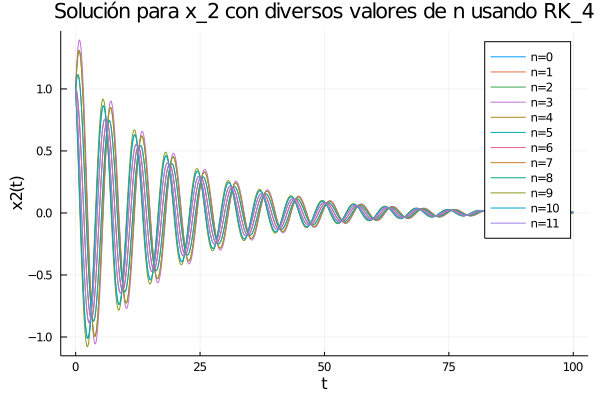

In [7]:
plot(title="Solución para x_2 con diversos valores de n usando RK_4",xlabel="t",ylabel="x2(t)")
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
    plot!(tiempo1,sol1[:,2],label ="n=$(i)", lw=1.0)
end
plot!()

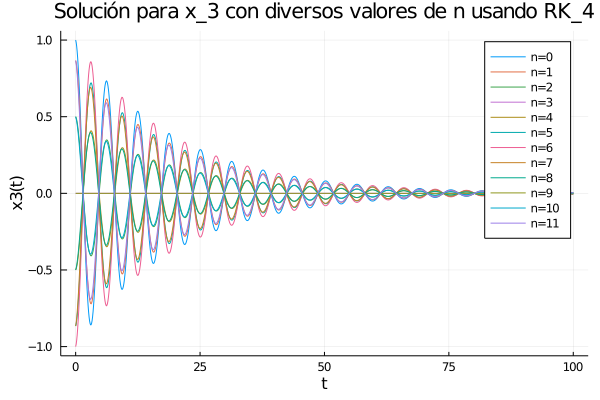

In [8]:
plot(title="Solución para x_3 con diversos valores de n usando RK_4",xlabel="t",ylabel="x3(t)")
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
    plot!(tiempo1,sol1[:,3],label ="n=$(i)", lw=1.0)
end
plot!()

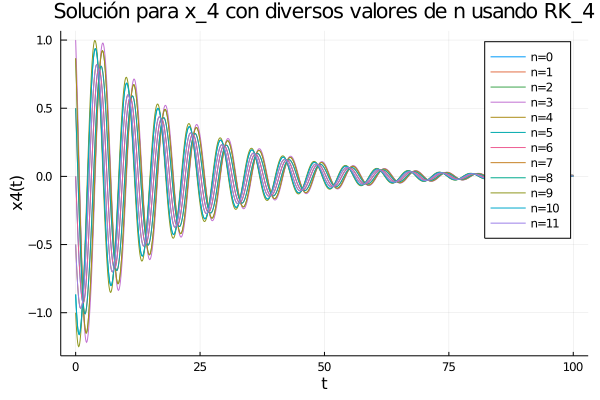

In [9]:
plot(title="Solución para x_4 con diversos valores de n usando RK_4",xlabel="t",ylabel="x4(t)")
for i in n 
    sol1=RK_4(sistema1,[0.0,1.0,cos(i*π/6),sin(i*π/6)],tiempo1)
    plot!(tiempo1,sol1[:,4],label ="n=$(i)", lw=1.0)
end
plot!()

#### (c) Genere una función que calcule la energía para las distintas condiciones iniciales y detenga la simulación cuando esta sea menor al 30 % de su valor inicial. Cabe mencionar que debe hacer su simulación (paso de integración) de tal manera que el error en la trayectoria no tenga variaciones de más del 1 %, es decir se debe asegurar convergencia a la solución con error de a lo mas 1 %.

La energía total de nuestro sistema será:
$$E=\frac{m}{2}(v_x^{2}+v_y^{2})+\frac{k}{2}(x^{2}+y^{2}) $$
Sustituimos k=1=m y se tiene que
$$E=\frac{1}{2}(v_x^{2}+v_y^{2}+x^{2}+y^{2}) $$
Así, definimos una función que nos de la energía del sistema a cada tiempo:

In [4]:
function energia(p0,t,EDO)
    #Definimos los arreglos donde anexaremos la información sobre las posiciones y velocidades
    x=RK_4(EDO,p0,t)[:,1]
    y=RK_4(EDO,p0,t)[:,2]
    vx=RK_4(EDO,p0,t)[:,3]
    vy=RK_4(EDO,p0,t)[:,4]
    #Definimos el arreglo donde guardaremos la información de la energía a cada tiempo
    U=[]
    #Definimos la energía inicial
    Uinicial=0.5*(x[1]^2+y[1]^2+vx[1]^2+vy[1]^2)
    #Realizamos un ciclo para obtener la energía en los tiempos posteriores
    for i in 1:length(t)
    #Anexamos la ecuación para la i-ésima posición, velocidad
        energia=0.5*(x[i]^2+y[i]^2+vx[i]^2+vy[i]^2)
        #Debido a que el sistema perderá energía, le pedimos al sistema que guarde la información
        #cuando la energía sea mayor a 30%
        if energia>=0.3*Uinicial
            push!(U,energia)
        end
    end
    return U
end

energia (generic function with 1 method)

In [7]:
tiempo1_p=collect(0:0.01:70π)
sol1_p=energia([0.0,1.0,1.0,0.0],tiempo1_p,sistema1)

1206-element Array{Any,1}:
 1.0
 0.9990009984994946
 0.9980039927724474
 0.9970089782334484
 0.9960159499093854
 0.9950249024418073
 0.9940358300894377
 0.993048726730836
 0.9920635858672043
 0.9910804006253428
 0.9900991637607472
 0.9891198676608489
 0.9881425043483966
 ⋮
 0.3035500921838956
 0.30323220835392717
 0.30291474844446115
 0.3025977175652783
 0.3022811207653506
 0.30196496303082493
 0.3016492492830353
 0.30133398437654535
 0.3010191730972215
 0.3007048201603374
 0.300390930208711
 0.30007750781087394

Definamos una función que nos de la máxima variación que tiene nuestra solución entre valores aledaños para asegurar que tenemos una variación menor a 0.01

In [24]:
function variacion(sol,t)
    x=sol[:,1]
    y=sol[:,2]
    vx=sol[:,3]
    vy=sol[:,4]
    difx=[]
    dify=[]
    difvx=[]
    difvy=[]
    for i in 2:length(t)
        push!(difx,abs(x[i-1]-x[i]))
        push!(dify,abs(y[i-1]-y[i]))
        push!(difvx,abs(vx[i-1]-vx[i]))
        push!(difvy,abs(vy[i-1]-vy[i]))
    end
    dif=[maximum(difx),maximum(dify),maximum(difvx),maximum(difvy)]
    max=maximum(dif)
    return max
end

variacion (generic function with 2 methods)

In [25]:
tiempo1_p=collect(0:0.01:70π)
variacion(RK_4(sistema1,[0.0,1.0,1.0,0.0],tiempo1_p),tiempo1_p)

0.009994835

#### (d) Dibuje las gráficas del momento angular para los casos anteirores en el inciso (1b). 

#### (e) Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase (px, x).

#### 3. Se tiene la siguiente función: $$f(x,y)=2e^{(x+1)^{2}}\left(e^{-(y+2)^{2}}+e^{-(y-2)^{2}}\right)+6x(x^{2}+y^{2})e^{-(x^{2}+y^{2})}-1$$ Encuentre los puntos $(\~x, \~y)$ tales que $f(\~x, \~y)=0$ y dibuje estos puntos en el plano xy.
#### Hint: Como podrá notar los puntos a buscar se encuentran en la región x, y ∈ (−4, 4) × (−4, 4). Una forma de obtener los puntos es haciendo un barrido para x fija y encontrando todas las raíces de la ecuación en términos de y. Entre más fino haga el barrido, la curva de nivel que se encuentre será mejor.

In [2]:
function raiz_bf(funcion,intervalo,error=1e-4)
    raiz = 0.5*(intervalo[1]+intervalo[2])
    iteracion = 0
    while abs(intervalo[2]-intervalo[1]) > error
        f_izq , f_med = funcion(intervalo[1]) , funcion(raiz)
        if f_izq*f_med < 0
            intervalo[2] = raiz
        else
            intervalo[1] = raiz
        end
        raiz = 0.5*(intervalo[1]+intervalo[2])
        iteracion += 1
    end
    return raiz,iteracion
end

raiz_bf (generic function with 2 methods)

In [ ]:
function raiz_NewtonMult2(funcion,inicio,fin,delta,f_prima,error=1e-4)
    #Definimos el número de trozos en los que dividiremos nuestro sistema
    cortes=floor(Int,(fin-inicio)/delta)
    #Definimos el arreglo donde anexaremos las raíces
    raices=[]
    iteraciones=[]
    #Hacemos un ciclo dónde se buscarán las raíces tomando como inicio puntos en ese espacio
    for i in 0:cortes-1
        #Integramos el método de Newton para cada i
        iteracion = 0
        #Definimos nuestro punto de inicio
        p_ini=inicio+i*delta
        while abs(funcion(p_ini)) > error
            p_ini += -(funcion(p_ini)/f_prima(p_ini))
            iteracion +=1
        end
        #Anexamos la raíz encontrada al arreglo raíces
        push!(raices,p_ini)
    end
    #Salimos del ciclo for y le pedimos a la función que nos regrese el arreglo de las raíces
    return raices
end

In [ ]:
function raiz_NewtonMult(funcion,intervalo,delta,f_prima,error=1e-4)
    #Definimos el número de trozos en los que dividiremos nuestro sistema
    
    cortes=floor(Int,((intervalo[2]-intervalo[1])*delta))
    #Int((intervalo[2]-intervalo[1])*delta)
    #Definimos el arreglo donde anexaremos las raíces
    raices=[]
    iteraciones=[]
    #Hacemos un ciclo dónde se buscarán las raíces tomando como inicio puntos en ese espacio
    for i in 1:3
        #Integramos el método de Newton para cada i
        iteracion = 0
        #Definimos nuestro punto de inicio
        p_ini=intervalo[1]+i*delta
        while abs(funcion(p_ini)) > error
            p_ini += -(funcion(p_ini)/f_prima(p_ini))
            iteracion +=1
        end
        #Anexamos la raíz encontrada al arreglo raíces
        push!(raices,p_ini)
    end
    #Salimos del ciclo for y le pedimos a la función que nos regrese el arreglo de las raíces
    return raices
end

In [ ]:
raiz_NewtonMult(sin,[-1π,2π],0.1,cos)

In [ ]:
function raiz_NewtonMult2(funcion,inicio,fin,delta,f_prima,error=1e-4)
    #Definimos el número de trozos en los que dividiremos nuestro sistema
    cortes=floor(Int,(fin-inicio)/delta)
    #Definimos el arreglo donde anexaremos las raíces
    raices=[]
    iteraciones=[]
    #Hacemos un ciclo dónde se buscarán las raíces tomando como inicio puntos en ese espacio
    for i in 0:cortes-1
        #Integramos el método de Newton para cada i
        iteracion = 0
        #Definimos nuestro punto de inicio
        p_ini=inicio+i*delta
        while abs(funcion(p_ini)) > error
            p_ini += -(funcion(p_ini)/f_prima(p_ini))
            iteracion +=1
        end
        #Anexamos la raíz encontrada al arreglo raíces
        push!(raices,p_ini)
    end
    #Salimos del ciclo for y le pedimos a la función que nos regrese el arreglo de las raíces
    return raices
end

In [46]:
function raiz_NewtonMult2filtro(funcion,inicio,fin,delta,f_prima,error=1e-4)
    #Definimos el número de trozos en los que dividiremos nuestro sistema
    cortes=floor(Int,(fin-inicio)/delta)
    #Definimos el arreglo donde anexaremos las raíces
    raices=[]
    iteraciones=[]
    #Hacemos un ciclo dónde se buscarán las raíces tomando como inicio puntos en ese espacio
    for i in 0:cortes-1
        #Integramos el método de Newton para cada i
        iteracion = 0
        #Definimos nuestro punto de inicio
        p_ini=inicio+i*delta
        while abs(funcion(p_ini)) > error
            p_ini += -(funcion(p_ini)/f_prima(p_ini))
            iteracion +=1
        end
        #Anexamos la raíz encontrada al arreglo raíces, para ello descartamos las raíces que divergen debido al método de Newton
        if p_ini==Inf 
            false
        else
        # Y anexamos las raíces que no divergen
            push!(raices,p_ini)
        end
    end
    #Hagamos un segundo filtrado para tener raíces únicas
    #Le pedimos a la función que nos regrese el arreglo de las raíces
    return raices
end

raiz_NewtonMult2filtro (generic function with 2 methods)

In [47]:
f(x,y=0)=2*exp(-(x+1)^2)*(exp(-(y+2)^2)+exp(-(y-2)^2)) + 6*x*(x^2 + y^2)*exp(-(x^2+y^2))-1
#df(x,y=0)=12*x^2*exp(-x^2-y^2)-12*x^2*exp(-x^2-y^2)*(x^2+y^2)+6*exp(-x^2-y^2)*(x^2+y^2)

f (generic function with 2 methods)

In [48]:
dfx(x,y=0)=-4*exp(-(x+1)^2)*(x+1)*(exp(-(y-2)^2)+exp(-(y+2)^2))+(exp(-x^2-y^2)*(18*x^2+6*y^2))-(12*x^2*(x^2+y^2)*exp(-(x^2+y^2)))

dfx (generic function with 2 methods)

In [ ]:
raices2=[]
y02=collect(-4:1:4)
ys2=[]
for y0 in yp
    fx(x,y=y0)=2*exp(-(x+1)^2)*(exp(-(y+2)^2)+exp(-(y-2)^2)) + 6*x*(x^2 + y^2)*exp(-(x^2+y^2))-1
    dfx(x,y=y0)=-4*exp(-(x+1)^2)*(x+1)*(exp(-(y-2)^2)+exp(-(y+2)^2))+(exp(-x^2-y^2)*(18*x^2+6*y^2))-(12*x^2*(x^2+y^2)*exp(-(x^2+y^2)))
    n=length(find_zeros(fx,-4,4))
    for i in 1:n
        elemento=raiz_NewtonMult2filtro(fx,-4,4,1,dfx)
        push!(raices2,elemento)
        push!(ys2,y02)
        #scatter!(y0,elemento,xlabel="x",ylabel="f(x)")
    end
end
scatter(raices2,ys2,xlabel="x",ylabel="y")

In [49]:
raiz_NewtonMult2filtro(f,-4,4,1.5,dfx)

3-element Array{Any,1}:
 0.6260313908578603
 0.6260311571090578
 1.9469265118941532

In [ ]:
#Creamos la función para filtrar las raíces y así tener raíces únicas
function filtrodraiz(f,raices,error=1e-4)
    nraices=length(raices)
    i=1
    #func=f(raices[i])
    raiz1=[],[]
    inicio=1
    raiz_inicio=raiz[inicio]
    for i in 1:nraices
    while raices[i]-raiz_inicio<=error
        if abs(raices[i]-raiz_inicio)<=error
        suma+=raiz[i]
        i+=1
        else
        raiz_inicio=raiz[i]
        end
    end
  
end

In [ ]:
function raiz_Newton(funcion,p_ini,f_prima,error=1e-4)
    iteracion = 0
    while abs(funcion(p_ini)) > error
        p_ini += -(funcion(p_ini)/f_prima(p_ini))
        iteracion +=1
    end
    return p_ini,iteracion
end

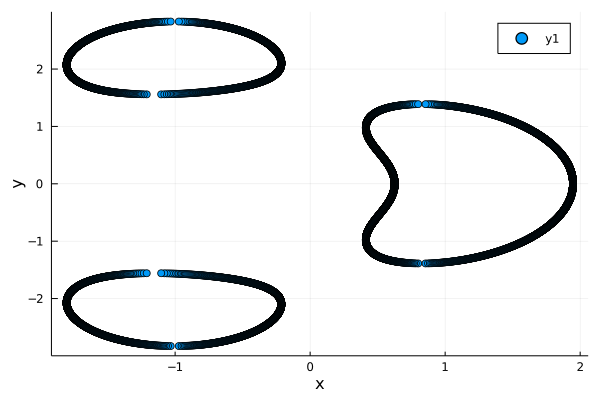

In [45]:
raices=[]
yp=collect(-4:0.001:4)
ys=[]
for y0 in yp
    fx(x,y=y0)=2*exp(-(x+1)^2)*(exp(-(y+2)^2)+exp(-(y-2)^2)) + 6*x*(x^2 + y^2)*exp(-(x^2+y^2))-1
    n=length(find_zeros(fx,-4,4))
    for i in 1:n
        elemento=find_zeros(fx,-4,4)[i]
        push!(raices,elemento)
        push!(ys,y0)
    end
end
scatter(raices,ys,xlabel="x",ylabel="y")

In [ ]:
f(x,y)=2*exp((x+1)^2)*(exp(-(y+2)^2)+exp(-(y-2)^2))+6*x*(x^2+y^2)*exp(-(x^2+y^2))-1